In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [8]:
def syntag1(y, t, tau_w, stim_func, dopa):
    """synaptic tagging model 1. It uses 2 intermediate variables which then would be summed up

    Parameters
    ----------
    y
        tuples of voltage to be integrated
    t
        time vector
    tau_w
        time constant of voltage
    stim_func
        stimulus function of time
    dopa
        presence of dopamine
    """
    w1, w2 = y

    fw1 =  (w1 + stim_func(t))/tau_w

    fw2 = -w2*(w2-0.5)*(w2-1) + dopa

    return [fw1, fw2]

In [9]:
def syntag2(y, t, tc_short, tc_long, stim_func, dopa):
    """synaptic tagging model2. time constant of voltage were modulated by dopamine function

    Parameters
    ----------
    y
        tuples of voltage and time constant to be integrated
    t
        time
    tc_short
        short time contant when dopamine does not modulating 
    tc_long
        long time constant when dopamine is modulating
    stim_func
        stimulus function of time
    dopa
        presence of dopamine
    """
    w, gamma = y
    
    fw = (-w + stim_func(t)) * gamma
    f_gamma = -gamma * (gamma - 1/tc_long) * (gamma - 1/tc_short) + dopa

    return [fw, f_gamma]

In [10]:
STIM_START = 0.5
STIM_STOP = 1.0

def stim_func(t):
    if t > STIM_START and t< STIM_STOP:
        return 1
    return 0

In [16]:
t = np.linspace(0, 10, 101)
y0 = [0.5, 0.5]

sol = odeint(syntag1, y0, t, args=(1, stim_func, 1))

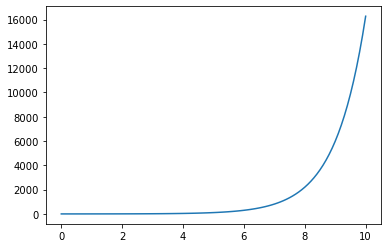

In [17]:
plt.plot(t, sol[:, 0])

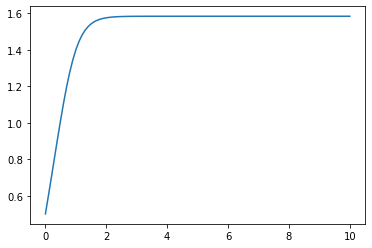

In [18]:
plt.plot(t, sol[:, 1])